$$
\textbf{Question 1:}
$$

$$
Importing\;neccessary\;libraries
$$

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math

$$
Creating\;a\;network\;with\;weights\;between\;low\;and\;high
$$

In [0]:
def network(input_size,hidden_size,output_size,low,high):
  whx=np.random.uniform(low, high, size=(hidden_size,input_size))
  woh=np.random.uniform(low, high, size=(output_size,hidden_size))
  
  bh=np.random.uniform(low, high, size=(hidden_size,))
  bo=np.random.uniform(low, high, size=(output_size,))
  
  return (np.matrix(whx),np.matrix(woh),np.matrix(bh),np.matrix(bo))

$$
Sigmoid\;function
$$

In [0]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

$$
Forward\;propagation
$$

In [0]:
def forward_propagation(x,Whx,Woh,Bh,Bo):
  h=np.dot(Whx,np.transpose(x))
  h=sigmoid(np.add(h,np.transpose(Bh)))
  
  o=np.dot(Woh,h)
  o=sigmoid(np.add(o,np.transpose(Bo)))
  
  return(h,o)
  

$$
Derivative\;of\;sigmoid\;function
$$

In [0]:
def transfer_derivative(num):
  return num-np.multiply(num,num)

$$
Back\;propagation
$$

In [0]:
def back_propagation(target,output,h,x,Woh):
  do=np.multiply(-(target-output),transfer_derivative(output))
  dWoh=np.matmul(np.matrix(do),np.matrix(np.transpose(h)))
  dBo=do
  
  dh=np.matmul(np.multiply(np.transpose(Woh)
                           ,transfer_derivative(h)),np.matrix(do))
  
  dWhx=np.matmul(np.matrix(dh),np.matrix(x))
  dBh=dh
  return(np.matrix(dWoh),np.matrix(dWhx),np.matrix(dBo),np.matrix(dBh))

$$
Full\;batch\;training
$$

In [0]:
def train(x,target,whx,woh,bh,bo,epochs,lr):
  for i in range(epochs):
    loss=0
    sdWoh,sdWhx=np.zeros(np.shape(woh)),np.zeros(np.shape(whx))
    sdBo,sdBh=np.zeros(np.shape(bo)),np.zeros(np.shape(bh))
    
    for j in range(np.shape(x)[0]):
      (h,o)=forward_propagation(np.array(x[j]),whx,woh,bh,bo)
      (dWoh,dWhx,dBo,dBh)=back_propagation(np.array(target[j])
                                           ,o,h,np.array(x[j])
                                           ,woh)
      
      sdWoh+=dWoh.reshape(np.shape(woh))
      sdWhx+=dWhx.reshape(np.shape(whx))
      sdBo+=dBo.reshape(np.shape(bo))
      sdBh+=dBh.reshape(np.shape(bh))
      loss+=0.5*np.sum(target[j][0]-o[0])**2
      
    whx=whx-lr*(1/np.shape(x)[0])*sdWhx.reshape(np.shape(whx))
    woh=woh-lr*(1/np.shape(x)[0])*sdWoh.reshape(np.shape(woh))
    bh=bh-lr*(1/np.shape(x)[0])*sdBh.reshape(np.shape(bh))
    bo=bo-lr*(1/np.shape(x)[0])*sdBo.reshape(np.shape(bo))
    
    print("Epoch:",end=" ")
    print(i+1)
    print("loss:",end=" ")
    print(loss/np.shape(x)[0])
    
  return(whx,woh,bh,bo)

$$
Training\;XOR\;gate\;on\;MLP
$$

$$
Creating\;network\;with\;values\;between\;(0,1)
$$

In [0]:
x1=[[[0,0]],[[0,1]],[[1,0]],[[1,1]]]
t1=[[0],[1],[1],[0]]
(Whx1,Woh1,Bh1,Bo1)=network(input_size=2,hidden_size=2
                            ,output_size=1,low=0,high=1)

$$
Training\;and\;testing\;XOR\;on\;MLP
$$

$$
\textbf{Question 1(a):}
$$

In [0]:
(Whx1,Woh1,Bh1,Bo1)=train(x1,t1,np.array(Whx1),np.array(Woh1)
                          ,np.array(Bh1),np.array(Bo1)
                          ,epochs=10000,lr=5)

print('output of XOR Gate:')
(h1,o1)=forward_propagation(np.array(x1[0]),Whx1,Woh1,Bh1,Bo1)
(h2,o2)=forward_propagation(np.array(x1[1]),Whx1,Woh1,Bh1,Bo1)
(h3,o3)=forward_propagation(np.array(x1[2]),Whx1,Woh1,Bh1,Bo1)
(h4,o4)=forward_propagation(np.array(x1[3]),Whx1,Woh1,Bh1,Bo1)
print("Input:",end=" ")
print(np.array(x1[0]),end=" ")
print("-->output:",end=" ")
print(o1[0])

print("Input:",end=" ")
print(np.array(x1[1]),end=" ")
print("-->output:",end=" ")
print(o2[0])

print("Input:",end=" ")
print(np.array(x1[2]),end=" ")
print("-->output:",end=" ")
print(o3[0])

print("Input:",end=" ")
print(np.array(x1[3]),end=" ")
print("-->output:",end=" ")
print(o4[0])

Epoch: 1
loss: 0.18015042747415538
Epoch: 2
loss: 0.1548396718567447
Epoch: 3
loss: 0.13339293912508948
Epoch: 4
loss: 0.1257147120013771
Epoch: 5
loss: 0.12466557235779976
Epoch: 6
loss: 0.12456084985662162
Epoch: 7
loss: 0.124538197380745
Epoch: 8
loss: 0.12452198373390462
Epoch: 9
loss: 0.12450608858717496
Epoch: 10
loss: 0.12449001324038006
Epoch: 11
loss: 0.12447370888031399
Epoch: 12
loss: 0.12445716243252464
Epoch: 13
loss: 0.12444036348853679
Epoch: 14
loss: 0.12442330166782861
Epoch: 15
loss: 0.12440596640229584
Epoch: 16
loss: 0.12438834691180378
Epoch: 17
loss: 0.12437043219427488
Epoch: 18
loss: 0.12435221101664377
Epoch: 19
loss: 0.12433367190570317
Epoch: 20
loss: 0.12431480313879192
Epoch: 21
loss: 0.1242955927343268
Epoch: 22
loss: 0.12427602844217636
Epoch: 23
loss: 0.1242560977338737
Epoch: 24
loss: 0.12423578779266313
Epoch: 25
loss: 0.12421508550337754
Epoch: 26
loss: 0.12419397744214125
Epoch: 27
loss: 0.12417244986589497
Epoch: 28
loss: 0.1241504887017389
Epoch: 2

$$
AND\;gate
$$

$$
Creating\;network\;with\;values\;in\;range(0,1)
$$

In [0]:
x2=[[[0,0]],[[0,1]],[[1,0]],[[1,1]]]
t2=[[0],[0],[0],[1]]
(Whx1,Woh1,Bh1,Bo1)=network(input_size=2,hidden_size=2,
                            output_size=1,low=0,high=1)

$$
\textbf{Question 1(b)}:
$$

In [0]:
(Whx1,Woh1,Bh1,Bo1)=train(np.array(x2),np.array(t2)
                          ,Whx1,Woh1,Bh1,Bo1
                          ,epochs=10000,lr=5)

print('output of AND Gate:')
(h1,o1)=forward_propagation(np.array(x2[0]),Whx1,Woh1,Bh1,Bo1)
(h2,o2)=forward_propagation(np.array(x2[1]),Whx1,Woh1,Bh1,Bo1)
(h3,o3)=forward_propagation(np.array(x2[2]),Whx1,Woh1,Bh1,Bo1)
(h4,o4)=forward_propagation(np.array(x2[3]),Whx1,Woh1,Bh1,Bo1)
print("Input:",end=" ")
print(np.array(x1[0]),end=" ")
print("-->output:",end=" ")
print(o1[0])

print("Input:",end=" ")
print(np.array(x1[1]),end=" ")
print("-->output:",end=" ")
print(o2[0])

print("Input:",end=" ")
print(np.array(x1[2]),end=" ")
print("-->output:",end=" ")
print(o3[0])

print("Input:",end=" ")
print(np.array(x1[3]),end=" ")
print("-->output:",end=" ")
print(o4[0])

Epoch: 1
loss: 0.36808127050801154
Epoch: 2
loss: 0.36801165416359705
Epoch: 3
loss: 0.36793576648930326
Epoch: 4
loss: 0.36785181238663195
Epoch: 5
loss: 0.3677573845217547
Epoch: 6
loss: 0.3676492413770232
Epoch: 7
loss: 0.36752299646934455
Epoch: 8
loss: 0.367372675572873
Epoch: 9
loss: 0.3671900712598782
Epoch: 10
loss: 0.36696377398427626
Epoch: 11
loss: 0.36667766385555667
Epoch: 12
loss: 0.36630845817588914
Epoch: 13
loss: 0.36582151288825193
Epoch: 14
loss: 0.36516318673458376
Epoch: 15
loss: 0.36424591832756803
Epoch: 16
loss: 0.36291637772896923
Epoch: 17
loss: 0.3608794338802073
Epoch: 18
loss: 0.3574873697583022
Epoch: 19
loss: 0.35101857447116647
Epoch: 20
loss: 0.33529668387606976
Epoch: 21
loss: 0.27522572995703265
Epoch: 22
loss: 0.12703019208040572
Epoch: 23
loss: 0.12617801015142865
Epoch: 24
loss: 0.12583184710846138
Epoch: 25
loss: 0.12563875434052266
Epoch: 26
loss: 0.12551455708980797
Epoch: 27
loss: 0.12542766043170805
Epoch: 28
loss: 0.12536334210792538
Epoch: 2

$$
OR\;gate
$$

$$
Creating\;network\;with\;weights\;in\;between\;(0,1)
$$

In [0]:
x3=[[[0,0]],[[0,1]],[[1,0]],[[1,1]]]
t3=[[0],[1],[1],[1]]
(Whx1,Woh1,Bh1,Bo1)=network(input_size=2,hidden_size=2
                            ,output_size=1,low=0,high=1)

$$
\textbf{Question 1(c)}:
$$

In [0]:
(Whx1,Woh1,Bh1,Bo1)=train(np.array(x3),np.array(t3)
                          ,Whx1,Woh1,Bh1,Bo1
                          ,epochs=10000,lr=5)

print('output of OR Gate:')
(h1,o1)=forward_propagation(np.array(x3[0]),Whx1,Woh1,Bh1,Bo1)
(h2,o2)=forward_propagation(np.array(x3[1]),Whx1,Woh1,Bh1,Bo1)
(h3,o3)=forward_propagation(np.array(x3[2]),Whx1,Woh1,Bh1,Bo1)
(h4,o4)=forward_propagation(np.array(x3[3]),Whx1,Woh1,Bh1,Bo1)
print("Input:",end=" ")
print(np.array(x1[0]),end=" ")
print("-->output:",end=" ")
print(o1[0])

print("Input:",end=" ")
print(np.array(x1[1]),end=" ")
print("-->output:",end=" ")
print(o2[0])

print("Input:",end=" ")
print(np.array(x1[2]),end=" ")
print("-->output:",end=" ")
print(o3[0])

print("Input:",end=" ")
print(np.array(x1[3]),end=" ")
print("-->output:",end=" ")
print(o4[0])

Epoch: 1
loss: 0.08724992912851261
Epoch: 2
loss: 0.08700124387923858
Epoch: 3
loss: 0.08674357366228962
Epoch: 4
loss: 0.08647573209210842
Epoch: 5
loss: 0.0861969111927237
Epoch: 6
loss: 0.08590640414135377
Epoch: 7
loss: 0.08560351264106045
Epoch: 8
loss: 0.08528751592359132
Epoch: 9
loss: 0.08495765998010214
Epoch: 10
loss: 0.08461315347464826
Epoch: 11
loss: 0.0842531660162646
Epoch: 12
loss: 0.08387682746668629
Epoch: 13
loss: 0.08348322793331156
Epoch: 14
loss: 0.08307141841750448
Epoch: 15
loss: 0.08264041220122985
Epoch: 16
loss: 0.08218918710187703
Epoch: 17
loss: 0.0817166887502225
Epoch: 18
loss: 0.08122183506287664
Epoch: 19
loss: 0.0807035220912074
Epoch: 20
loss: 0.08016063143309857
Epoch: 21
loss: 0.07959203939005996
Epoch: 22
loss: 0.07899662803755135
Epoch: 23
loss: 0.07837329834793011
Epoch: 24
loss: 0.07772098546010012
Epoch: 25
loss: 0.07703867612487598
Epoch: 26
loss: 0.07632542826812351
Epoch: 27
loss: 0.07558039250401022
Epoch: 28
loss: 0.07480283529925813
Epoch

$$
Experimenting\;the\;number\;of\;samples:
$$

In [0]:
def generate_data(N,gate):
  if(gate=='XOR'):
    x=[[[0,0]],[[0,1]],[[1,0]],[[1,1]]]
    t=[[0],[1],[1],[0]]
  if(gate=='AND'):
    x=[[[0,0]],[[0,1]],[[1,0]],[[1,1]]]
    t=[[0],[0],[0],[1]]
  else:
    x=[[[0,0]],[[0,1]],[[1,0]],[[1,1]]]
    t=[[0],[1],[1],[1]]
  
  input_data=list()
  labels=list()
  itera=1
  while(itera<=N):
    noise1=np.random.uniform(0.01,0.1, size=(1,2))
    noise2=np.random.uniform(0.01,0.1, size=(1,))
    
    input_data.append(x[(itera-1)%4]+np.matrix(noise1))
    labels.append(t[(itera-1)%4]+np.matrix(noise2))
    
    itera+=1
  
  return(input_data,labels)

$$
Training\;MLP\;with\;40\;randomly\;generated\;noise\;OR\;gate\;data:
$$

In [0]:
(xn,tn)=generate_data(40,gate="OR")
(Whxn,Wohn,Bhn,Bon)=network(input_size=2,hidden_size=2
                            ,output_size=1,low=0,high=1)

In [0]:
(Whxn,Wohn,Bhn,Bon)=train(np.array(xn),np.array(tn)
                          ,Whxn,Wohn,Bhn,Bon,epochs=5000,lr=5)

print('output of OR Gate on noised samples:')
(h1,o1)=forward_propagation(np.array(xn[0]),Whxn,Wohn,Bhn,Bon)
(h2,o2)=forward_propagation(np.array(xn[1]),Whxn,Wohn,Bhn,Bon)
(h3,o3)=forward_propagation(np.array(xn[2]),Whxn,Wohn,Bhn,Bon)
(h4,o4)=forward_propagation(np.array(xn[3]),Whxn,Wohn,Bhn,Bon)
print("Input:",end=" ")
print(np.array(xn[0]),end=" ")
print("-->output:",end=" ")
print(o1[0])

print("Input:",end=" ")
print(np.array(xn[1]),end=" ")
print("-->output:",end=" ")
print(o2[0])

print("Input:",end=" ")
print(np.array(xn[2]),end=" ")
print("-->output:",end=" ")
print(o3[0])

print("Input:",end=" ")
print(np.array(xn[3]),end=" ")
print("-->output:",end=" ")
print(o4[0])

Epoch: 1
loss: 0.09109457061299205
Epoch: 2
loss: 0.0908579429390762
Epoch: 3
loss: 0.09063305759597401
Epoch: 4
loss: 0.09041218682333671
Epoch: 5
loss: 0.09019118484367675
Epoch: 6
loss: 0.08996769734357099
Epoch: 7
loss: 0.08974029346504067
Epoch: 8
loss: 0.08950802801366067
Epoch: 9
loss: 0.08927021406660371
Epoch: 10
loss: 0.08902630223382173
Epoch: 11
loss: 0.08877581543690646
Epoch: 12
loss: 0.08851831314691996
Epoch: 13
loss: 0.0882533714659425
Epoch: 14
loss: 0.08798057180966848
Epoch: 15
loss: 0.08769949429129226
Epoch: 16
loss: 0.0874097136917205
Epoch: 17
loss: 0.08711079686589399
Epoch: 18
loss: 0.08680230096078848
Epoch: 19
loss: 0.08648377210875141
Epoch: 20
loss: 0.0861547444182943
Epoch: 21
loss: 0.08581473917201782
Epoch: 22
loss: 0.08546326419011804
Epoch: 23
loss: 0.08509981334554964
Epoch: 24
loss: 0.0847238662330871
Epoch: 25
loss: 0.08433488800454014
Epoch: 26
loss: 0.08393232938912527
Epoch: 27
loss: 0.08351562692302925
Epoch: 28
loss: 0.08308420341632718
Epoch:

$$
\textbf{Affect of noise on MLP}
\\By\;training\;MLP\;with\;noise\;samples\;the\;network\;becomes\;robust\;to\;noise\;input\;data
$$

$$
\textbf{Question 2:}
$$

$$
Training\;an\;MLP\;autoencoder\;on\;MNIST\;data
$$

$$
Data\;preprocessing\;of\;MNIST\;data
$$

In [0]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
X_train = np.vstack([img.reshape((28, 28)) for img in mnist.train.images])
y_train = mnist.train.labels
X_test = np.vstack([img.reshape(28, 28) for img in mnist.test.images])
y_test = mnist.test.labels
del mnist

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


$$
Data\;preprocessing(Using\;100\;MNIST\;images\;for\;training:):
$$

In [0]:
x_train=list()
y_train=list()
for i in range(0,28*100,X_train.shape[1]):
  r=list()
  for j in range(X_train.shape[1]):
    r=r+list(X_train[i+j])
  x_train.append(np.matrix(r))
  y_train.append(np.transpose(np.matrix(r)))

x_train=np.array(x_train)

$$
Creating\;autoencoder\;network\;with\;hidden\;layer\;size\;600
$$

In [0]:
(Whxa,Woha,Bha,Boa)=network(input_size=784,hidden_size=600
                            ,output_size=784,low=0.001
                            ,high=0.01)

(Whxa,Woha,Bha,Boa)=train(x_train,y_train,np.array(Whxa)
                          ,np.array(Woha),np.array(Bha)
                          ,np.array(Boa),epochs=100
                          ,lr=0.5)

Epoch: 1
loss: 0.3932176980090087
Epoch: 2
loss: 0.00013304560922209954
Epoch: 3
loss: 0.000854547995215412
Epoch: 4
loss: 0.0010529291385548492
Epoch: 5
loss: 0.0009051570546703106
Epoch: 6
loss: 0.0007632549275437952
Epoch: 7
loss: 0.000658726839347508
Epoch: 8
loss: 0.0005807317383015539
Epoch: 9
loss: 0.0005218633744611421
Epoch: 10
loss: 0.00047611916779253014
Epoch: 11
loss: 0.0004401562708134962
Epoch: 12
loss: 0.0004115273074439886
Epoch: 13
loss: 0.0003885361329200919
Epoch: 14
loss: 0.00036983401822621284
Epoch: 15
loss: 0.00035439294580764995
Epoch: 16
loss: 0.00034138500423762765
Epoch: 17
loss: 0.0003301460938514933
Epoch: 18
loss: 0.0003201124399816671
Epoch: 19
loss: 0.000310789557605973
Epoch: 20
loss: 0.000301717718220268
Epoch: 21
loss: 0.0002924567949696851
Epoch: 22
loss: 0.00028258251012071506
Epoch: 23
loss: 0.0002717141811739199
Epoch: 24
loss: 0.0002595831118237557
Epoch: 25
loss: 0.0002461449494742384
Epoch: 26
loss: 0.00023167951170260226
Epoch: 27
loss: 0.000

$$
Reconstructing\;the\;image\;from\;orginal\;image\;using\;MLPautoencoder
$$

Orginal image:


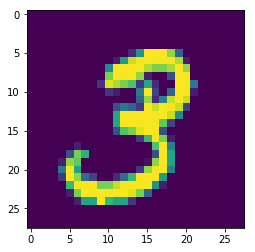

Reconstructed_image from MLP autoencoder:


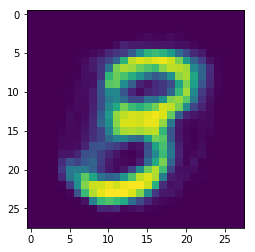

In [0]:
print('Orginal image:')
plt.imshow(x_train[1].reshape(28,28))
plt.show()
(ha,oa)=forward_propagation(np.array(x_train[1]),Whxa,Woha,Bha,Boa)
print("Reconstructed_image from MLP autoencoder:")
plt.imshow(oa.reshape(28,28))

$$
\textbf{Question 3:}
$$

$$
Sparse\;autoencoder(784,500,784)\;from\;scratch
$$

$$
KL\;divergence
$$

In [0]:
def kl_divergence(p,h):
  return np.sum(p*np.log(p/h)+(1-p)*np.log((1-p)/(1-h)))

$$
Backpropagation\;for\;sparse\;autoencoder
$$

In [0]:
def back_propagation_autoencoder(target,output,h,x,Woh):
  do=np.multiply(-(target-output),transfer_derivative(output))
  dWoh=np.matmul(np.matrix(do),np.matrix(np.transpose(h)))
  dBo=do
  
  dh=np.matmul(np.multiply(np.transpose(Woh),transfer_derivative(h))
               ,np.matrix(do))
  dWhx=np.matmul(np.matrix(dh),np.matrix(x))
  dBh=dh
  
  dsh=np.matmul(transfer_derivative(h),np.matrix(x))
  
  return(np.matrix(dWoh),np.matrix(dWhx),np.matrix(dBo)
         ,np.matrix(dBh),np.matrix(dsh))

$$
Full\;batch\;gradient\;descent\;for\;sparse\;autoencoder
$$

In [0]:
def train_autoencoder(x,target,whx,woh,bh,bo,epochs,lr,sp,lamda):
  for i in range(epochs):
    loss=0
    sdWoh,sdWhx=np.zeros(np.shape(woh)),np.zeros(np.shape(whx))
    sdBo,sdBh=np.zeros(np.shape(bo)),np.zeros(np.shape(bh))
    sdsh=np.zeros(np.shape(whx))
    sh=np.zeros((np.shape(whx)[0],1))
    for j in range(np.shape(x)[0]):
      (h,o)=forward_propagation(np.array(x[j]),whx,woh,bh,bo)
      (dWoh,dWhx,dBo,dBh,dsh)=back_propagation_autoencoder(np.array(target[j])
                                                           ,o,h,np.array(x[j])
                                                           ,woh)
      
      sdWoh+=dWoh.reshape(np.shape(woh))
      sdWhx+=dWhx.reshape(np.shape(whx))
      sdBo+=dBo.reshape(np.shape(bo))
      sdBh+=dBh.reshape(np.shape(bh))
      sh+=h.reshape(np.shape(h))
      sdsh+=np.multiply(sdsh/(j+1)
                        ,(-sp/(sh/(j+1))
                          +(1-sp)/(1-sh/(j+1)))).reshape(np.shape(whx))
      
      loss+=0.5*np.sum((target[j][0]-o[0])**2)+lamda*kl_divergence(sp,sh/(j+1))
    
    eff_sdWhx=(sdWhx+lamda*sdsh).reshape(np.shape(whx))
    whx=whx-lr*(1/np.shape(x)[0])*eff_sdWhx
    woh=woh-lr*(1/np.shape(x)[0])*sdWoh.reshape(np.shape(woh))
    bh=bh-lr*(1/np.shape(x)[0])*sdBh.reshape(np.shape(bh))
    bo=bo-lr*(1/np.shape(x)[0])*sdBo.reshape(np.shape(bo))
    
    print("Epoch:",end=" ")
    print(i+1)
    print("loss:",end=" ")
    print(loss/np.shape(x)[0])
    
  return(whx,woh,bh,bo)

$$
Training\;sparse\;autoencoder(784,500,784)\;on\;MNIST\;data
$$

In [0]:
(Whxa1,Woha1,Bha1,Boa1)=network(784,500,784,low=0.001,high=0.01)
(Whxa1,Woha1,Bha1,Boa1)=train_autoencoder(x_train,y_train,np.array(Whxa1)
                                          ,np.array(Woha1),np.array(Bha1)
                                          ,np.array(Boa1),epochs=250
                                          ,lr=0.5,sp=0.0001,lamda=0.0000001)

Epoch: 1
loss: 0.36328455420771766
Epoch: 2
loss: 0.0007634300992640092
Epoch: 3
loss: 0.0029785229234434146
Epoch: 4
loss: 0.0021926602534058644
Epoch: 5
loss: 0.001706575150520859
Epoch: 6
loss: 0.0013644543641869408
Epoch: 7
loss: 0.0011273072709566696
Epoch: 8
loss: 0.0009615671797078106
Epoch: 9
loss: 0.0008432638007078041
Epoch: 10
loss: 0.0007561898316215744
Epoch: 11
loss: 0.0006899654714862624
Epoch: 12
loss: 0.0006380988999464752
Epoch: 13
loss: 0.0005964829249596094
Epoch: 14
loss: 0.0005624199411526969
Epoch: 15
loss: 0.0005340402946865153
Epoch: 16
loss: 0.0005099676046824187
Epoch: 17
loss: 0.0004891278249644454
Epoch: 18
loss: 0.00047063835234430044
Epoch: 19
loss: 0.00045374026154422606
Epoch: 20
loss: 0.0004377539174910029
Epoch: 21
loss: 0.0004220496529997817
Epoch: 22
loss: 0.0004060337899091186
Epoch: 23
loss: 0.00038915826753827427
Epoch: 24
loss: 0.0003709694895072923
Epoch: 25
loss: 0.00035121077897474194
Epoch: 26
loss: 0.0003299623737292074
Epoch: 27
loss: 0.00

$$
Reconstructing\;the\;image\;using\;sparse\;autoencoder
$$

Orginal image:


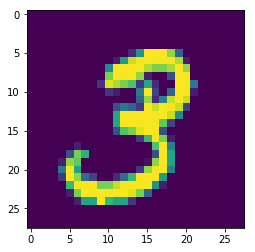

Reconstructed_image from sparse autoencoder:


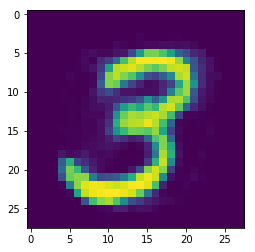

In [0]:
print('Orginal image:')
plt.imshow(x_train[1].reshape(28,28))
plt.show()
(ha1,oa1)=forward_propagation(np.array(x_train[1]),Whxa1,Woha1,Bha1,Boa1)
print("Reconstructed_image from sparse autoencoder:")
plt.imshow(oa1.reshape(28,28))